In [4]:
def subgraph(row_number1,row_number2):
    from openpyxl import Workbook
    import openpyxl
    path = r"C:\Users\user122\Desktop\ANDcircuits.xlsx"
    wb_obj = openpyxl.load_workbook(path)
    sheet_obj = wb_obj.active
    cell_obj = sheet_obj.cell(row = row_number1, column = 1)
    argv=cell_obj.value
    argv=argv.split('\n')

    nets1=[]
    for n in argv:
            n=n.split()
            nets1.extend([n])
    import matplotlib.pyplot as plt
    import networkx as nx
    edges=[]
    for i in nets1:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])

            else:
                edges.extend([[i[1], i[2]]])
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.circular_layout(G)
    plt.figure()
    nx.draw(
        G, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G.nodes()}
    )
    count=1
    edge_labels={}
    for i in nets1:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()
    cell_obj = sheet_obj.cell(row = row_number2, column = 1)
    argv=cell_obj.value
    argv=argv.split('\n')

    nets2=[]
    for n in argv:
            n=n.split()
            nets2.extend([n])
    edges=[]
    for i in nets2:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])

            else:
                edges.extend([[i[1], i[2]]])
    G1 = nx.Graph()
    G1.add_edges_from(edges)
    pos = nx.circular_layout(G1)
    plt.figure()
    nx.draw(
        G1, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G1.nodes()}
    )
    count=1
    edge_labels={}
    for i in nets2:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G1, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()
    inputsG=[]
    inputsG1=[]

    for i in nets1:
        for j in i:
            if'IN00'in j and j not in inputsG:
                inputsG.append(j)


    for i in nets2:
        for j in i:
            if'IN00'in j and j not in inputsG1:
                inputsG1.append(j)


    internal_linesG=[]
    internal_linesG1=[]


    for i in nets1:
        for j in i:
            if'N000'in j and j not in internal_linesG:
                internal_linesG.append(j)
            if'OUT'in j and j not in internal_linesG:
                internal_linesG.append(j)


    for i in nets2:
        for j in i:
            if'N000'in j and j not in internal_linesG1:
                internal_linesG1.append(j)
            if'OUT'in j and j not in internal_linesG1:
                internal_linesG1.append(j)
    for i in inputsG:
        for j in inputsG1:
            if i==j:
                inputsG1.remove(j)
                inputsG.remove(i)
    for i in internal_linesG:
        for j in internal_linesG1:
            if i==j:
                internal_linesG1.remove(j)
                internal_linesG.remove(i)
    internal_lines_map=[]
    inputs_map=[]
    if len(inputsG)==len(inputsG1):
        inputs_map =list(map (lambda i, j: [i,j], inputsG, inputsG1))
    
    if len(internal_linesG)==len(internal_linesG1):
        internal_lines_map = list(map (lambda i, j: [i,j], internal_linesG, internal_linesG1))
    new_nets2=[]
    
    for i in nets2:
        for j in i:
            if 'IN00' in j:
                b=i.index(j)
                for k in range (len(inputs_map)):
                    if i[b]==inputs_map[k][1]:
                        i.remove(j)
                        i.insert(b,inputs_map[k][0])
            if 'N000' in j or 'OUT' in j:
                b=i.index(j)
                for k in range (len(internal_lines_map)):
                    if i[b]==internal_lines_map[k][1]:
                        i.remove(j)
                        i.insert(b,internal_lines_map[k][0])
        new_nets2.append(i)
    for i in nets1:
        for j in new_nets2:
            if i[-1]=='PMOS' or i[-1]=='NMOS':
                if i[1:]==j[1:]:
                    print(str(i)+'\n')
                    print("is a similar net structure",'\n',str(nets1),'\n',str(nets2)+'\n \n')





            if i[-1]=='MR':
                if set(i[1:])==set(j[1:]):
                    print(str(i)+'\n')
                    print("is a similar net structure", '\n',str(nets1),'\n',str(nets2)+'\n \n')
    else:
                print("No similar structure found")
    print('The mapping between the two circuits is')
    for i in inputs_map:
        print(str(i[0]),'is mapped to', str(i[1]))
    for i in internal_lines_map:
        print(str(i[0]),'is mapped to', str(i[1]))
    lst=[]
    for i in nets1:
        a=[]
        for j in new_nets2:
            if i[-1]=='PMOS' or i[-1]=='NMOS':
                if i[1:]==j[1:] and i not in a:
                    a.append(list(i))

                    lst.extend(a)
            if i[-1]=='MR':
                if i[1:]==j[1:] and i not in a:
                    a.append(list(i))

                    lst.extend(a)
   
    edges=[]
    for i in lst:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])
            else:
                edges.extend([[i[1], i[2]]])
    G2 = nx.Graph()
    G2.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(
        G2, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G2.nodes()}
    )
    count=1
    edge_labels={}
    for i in lst:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G2, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()

    edges=[]
    for i in nets1:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])
            else:
                edges.extend([[i[1], i[2]]])
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.circular_layout(G)
    plt.figure()
    color_map = []
    for node in G:
        if node in list(G2.nodes()):
            color_map.append('blue')
        else: 
            color_map.append('green')
    color_map2 = []
    for edge in G.edges():
        if edge in G2.edges():
            color_map2.append('blue')
        else: 
            color_map2.append('green')  

    nx.draw(
        G, pos, edge_color=color_map2, width=1, linewidths=1,
        node_size=500, node_color=color_map, alpha=0.9,
        labels={node: node for node in G.nodes()}
    )
    count=1
    edge_labels={}
    for i in nets1:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()
    new_lst2=[]
    for i in lst:
        for j in i:
            if 'IN00' in j:
                b=i.index(j)
                for k in range (len(inputs_map)):
                    if i[b]==inputs_map[k][0]:
                        i.remove(j)
                        i.insert(b,inputs_map[k][1])
            if 'N000' in j or 'OUT' in j:
                b=i.index(j)
                for k in range (len(internal_lines_map)):
                    if i[b]==internal_lines_map[k][0]:
                        i.remove(j)
                        i.insert(b,internal_lines_map[k][1])
        new_lst2.append(i)

    edges=[]
    for i in new_lst2:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])
            else:
                edges.extend([[i[1], i[2]]])
    G3 = nx.Graph()
    G3.add_edges_from(edges)
    pos = nx.spring_layout(G3)
    plt.figure()
    nx.draw(
        G3, pos, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G3.nodes()}
    )
    count=1
    edge_labels={}
    for i in lst:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G3, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()
 
    edges=[]
    for i in nets2:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edges.extend([[i[1], i[3]]])
            else:
                edges.extend([[i[1], i[2]]])
    G1 = nx.Graph()
    G1.add_edges_from(edges)
    pos = nx.circular_layout(G1)
    plt.figure()
    color_map = []
    for node in G1:
        if node in list(G3.nodes()):
            color_map.append('blue')
        else: 
            color_map.append('green')
    color_map2 = []
    for edge in G1.edges():
        if edge in G3.edges():
            color_map2.append('blue')
        else: 
            color_map2.append('green')  

    nx.draw(
        G1, pos, edge_color=color_map2, width=1, linewidths=1,
        node_size=500, node_color=color_map, alpha=0.9,
        labels={node: node for node in G1.nodes()}
    )
    count=1
    edge_labels={}
    for i in nets2:
            if (i[-1]=="PMOS"or i[-1]=="NMOS"):
                edge_labelsupdate={(tuple([i[1], i[3]])): i[2]+' '+i[-1]}
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))
                count+=1
            else:
                edge_labelsupdate={(tuple([i[1], i[2]])): i[1]+'(p)  '+i[-1]+'  ' +i[2]+'(n)' }
                edge_labels=dict(list(edge_labels.items()) + list(edge_labelsupdate.items()))

    nx.draw_networkx_edge_labels(
        G1, pos, edge_labels,
        font_color='red'
    )
    plt.axis('off')
    plt.show()


    




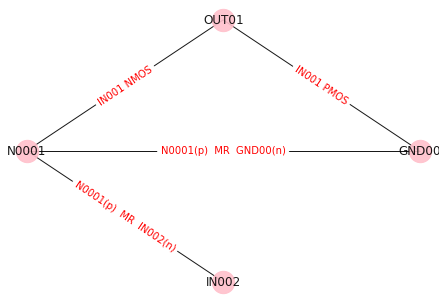

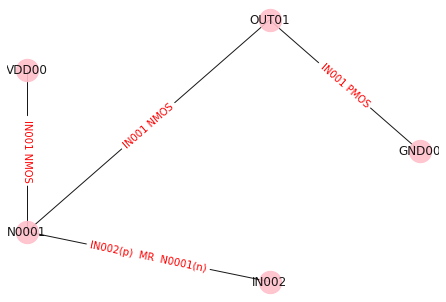

['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS']

is a similar net structure 
 [['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'N0001', 'GND00', 'MR'], ['M0004', 'N0001', 'IN002', 'MR']] 
 [['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'VDD00', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0004', 'IN002', 'N0001', 'MR']]
 

['M0002', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS']

is a similar net structure 
 [['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'N0001', 'GND00', 'MR'], ['M0004', 'N0001', 'IN002', 'MR']] 
 [['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'VDD00', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0004', 'IN002', 'N0001', 'MR']]
 

['M0004', 'N0001', 'IN002', 'MR']

is a similar net struct

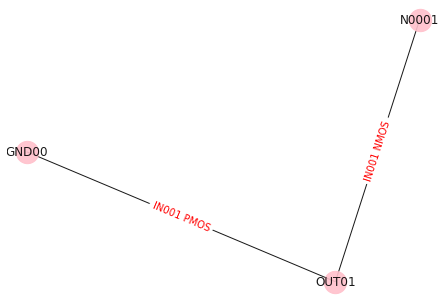

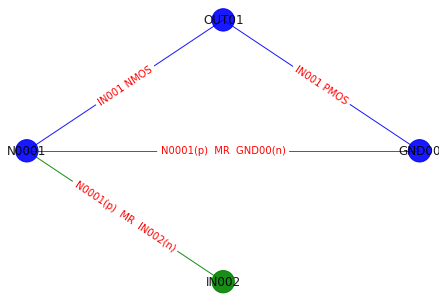

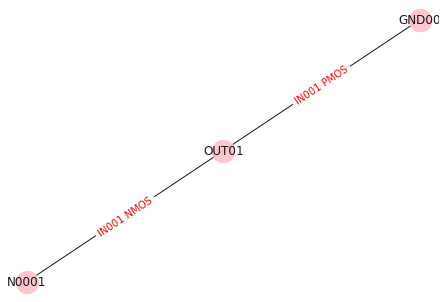

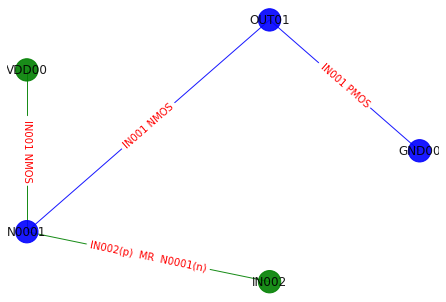

In [6]:
subgraph(50,5)

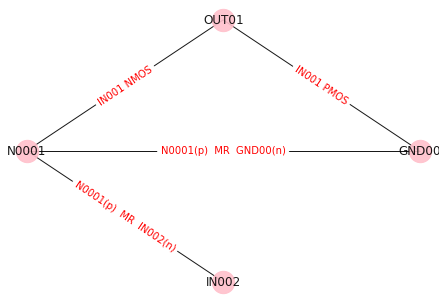

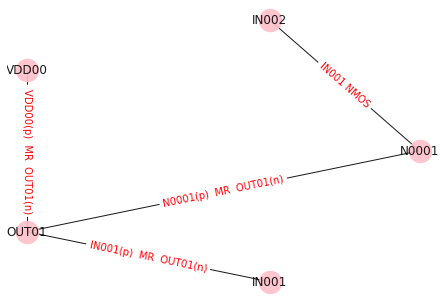

No similar structure found
The mapping between the two circuits is
IN002 is mapped to IN002
N0001 is mapped to N0001


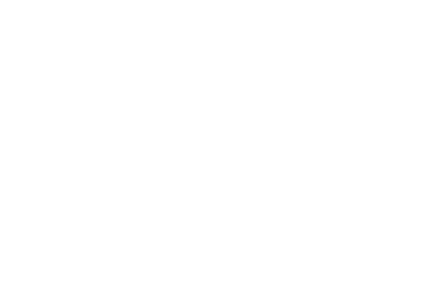

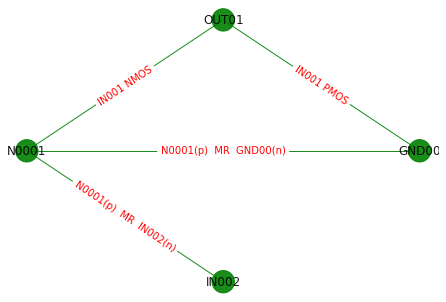

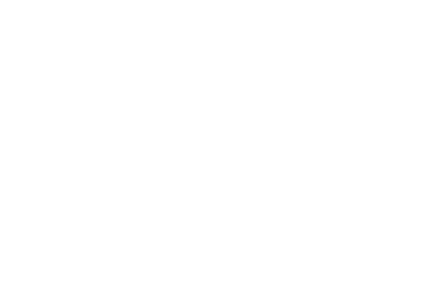

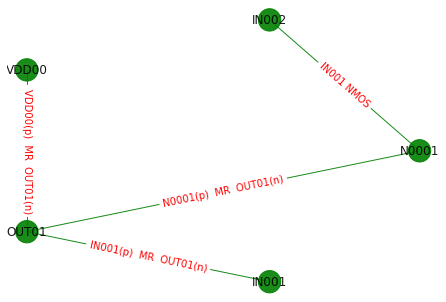

In [7]:
subgraph(50,70)

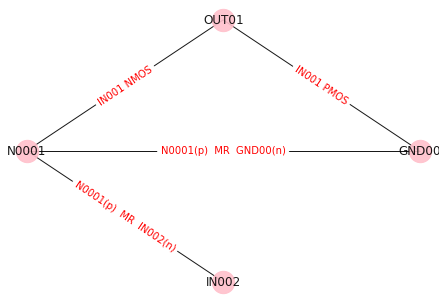

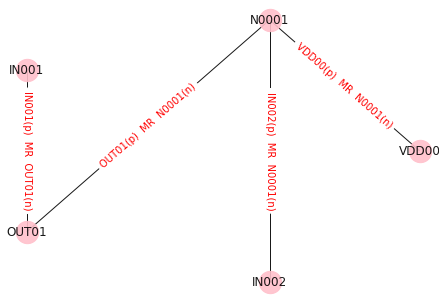

['M0004', 'N0001', 'IN002', 'MR']

is a similar net structure 
 [['M0001', 'GND00', 'IN001', 'OUT01', 'VDD00', 'PMOS'], ['M0002', 'OUT01', 'IN001', 'N0001', 'GND00', 'NMOS'], ['M0003', 'N0001', 'GND00', 'MR'], ['M0004', 'N0001', 'IN002', 'MR']] 
 [['M0001', 'VDD00', 'N0001', 'MR'], ['M0002', 'IN001', 'OUT01', 'MR'], ['M0003', 'OUT01', 'N0001', 'MR'], ['M0004', 'IN002', 'N0001', 'MR']]
 

No similar structure found
The mapping between the two circuits is
IN002 is mapped to IN002
N0001 is mapped to N0001


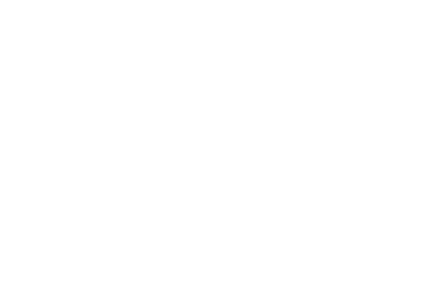

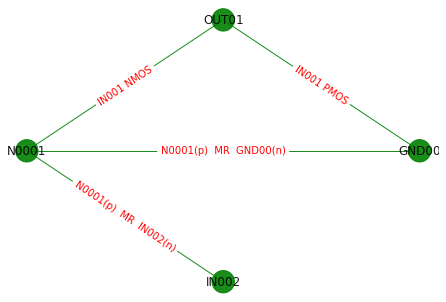

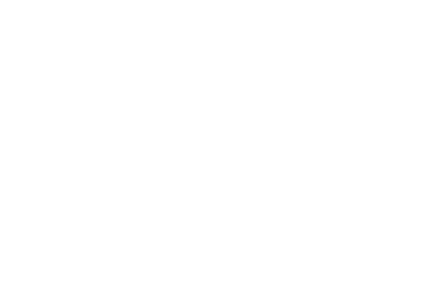

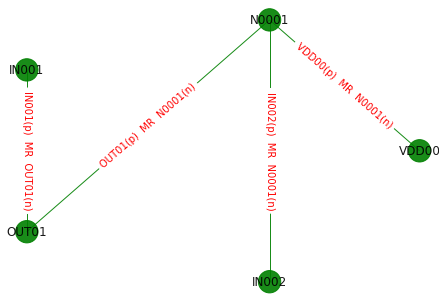

In [8]:
subgraph(50,90)

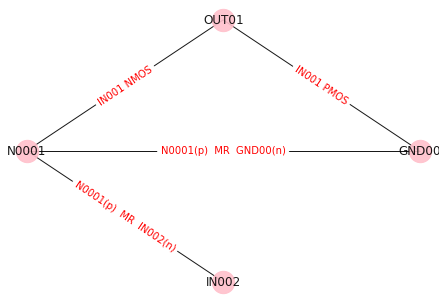

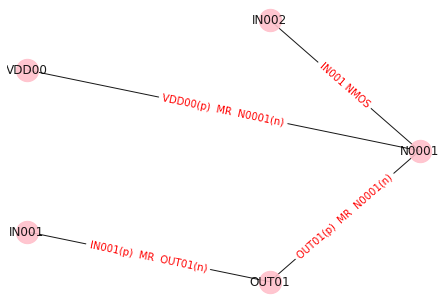

No similar structure found
The mapping between the two circuits is
IN002 is mapped to IN002
N0001 is mapped to N0001


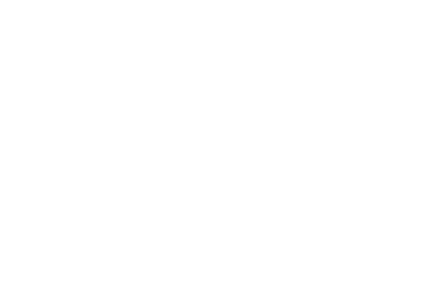

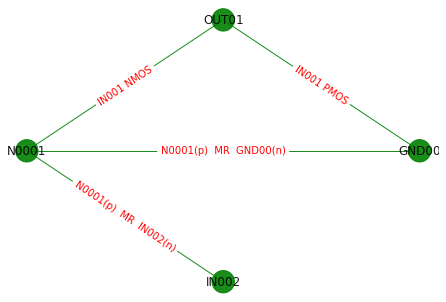

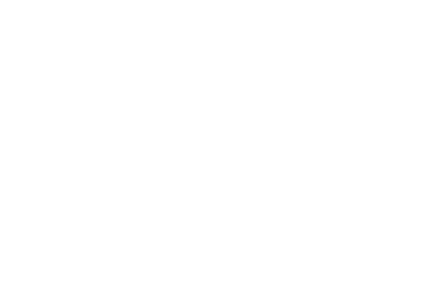

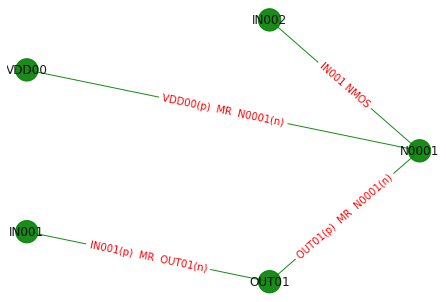

In [9]:
subgraph(50,71)

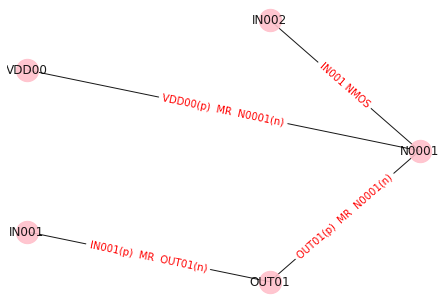

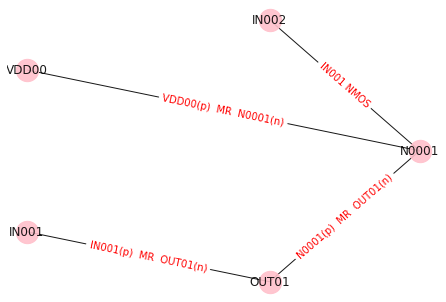

['M0001', 'N0001', 'IN001', 'IN002', 'GND00', 'NMOS']

is a similar net structure 
 [['M0001', 'N0001', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0002', 'VDD00', 'N0001', 'MR'], ['M0003', 'IN001', 'OUT01', 'MR'], ['M0004', 'OUT01', 'N0001', 'MR']] 
 [['M0001', 'N0001', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0002', 'VDD00', 'N0001', 'MR'], ['M0003', 'IN001', 'OUT01', 'MR'], ['M0004', 'N0001', 'OUT01', 'MR']]
 

['M0002', 'VDD00', 'N0001', 'MR']

is a similar net structure 
 [['M0001', 'N0001', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0002', 'VDD00', 'N0001', 'MR'], ['M0003', 'IN001', 'OUT01', 'MR'], ['M0004', 'OUT01', 'N0001', 'MR']] 
 [['M0001', 'N0001', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0002', 'VDD00', 'N0001', 'MR'], ['M0003', 'IN001', 'OUT01', 'MR'], ['M0004', 'N0001', 'OUT01', 'MR']]
 

['M0003', 'IN001', 'OUT01', 'MR']

is a similar net structure 
 [['M0001', 'N0001', 'IN001', 'IN002', 'GND00', 'NMOS'], ['M0002', 'VDD00', 'N0001', 'MR'], ['M0003', 'IN001', 'OUT01', 'MR'], ['M0004'

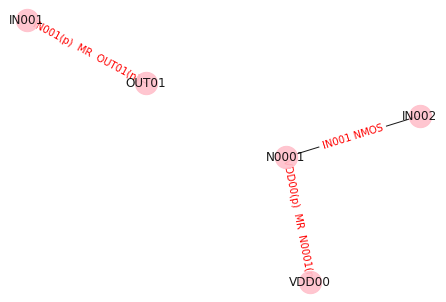

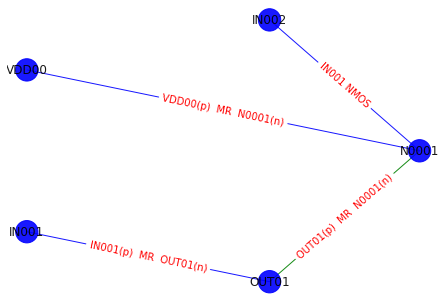

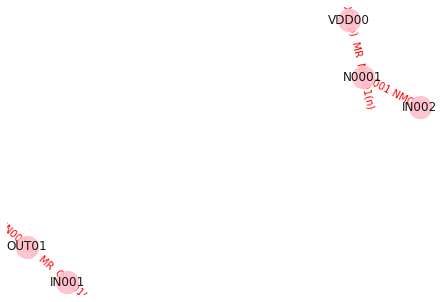

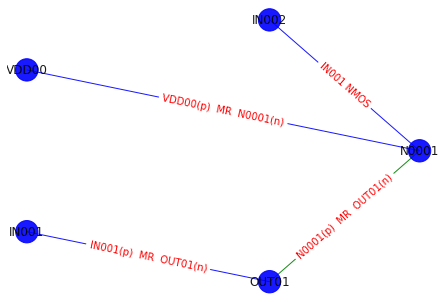

In [10]:
subgraph(71,72)